# Disease Classification Based On Drug Reviews

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings("ignore")
from wordcloud import WordCloud,STOPWORDS
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score,confusion_matrix
import pickle

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Datasets/UCIdrug_train.csv')

In [ ]:
df

uniqueID                  drugName                     condition  \
0         206461                 Valsartan  Left Ventricular Dysfunction   
1          95260                Guanfacine                          ADHD   
2          92703                    Lybrel                 Birth Control   
3         138000                Ortho Evra                 Birth Control   
4          35696  Buprenorphine / naloxone             Opiate Dependence   
...          ...                       ...                           ...   
161292    191035                   Campral            Alcohol Dependence   
161293    127085            Metoclopramide               Nausea/Vomiting   
161294    187382                   Orencia          Rheumatoid Arthritis   
161295     47128        Thyroid desiccated           Underactive Thyroid   
161296    215220              Lubiprostone         Constipation, Chronic   

                                                   review  rating       date  \
0       "It has no side effect, I take it in combinati...       9  20-May-12   
1       "My son is halfway through his fourth week of ...       8  27-Apr-10   
2       "I used to take another oral contraceptive, wh...       5  14-Dec-09   
3       "This is my first time using any form of birth...       8   3-Nov-15   
4       "Suboxone has completely turned my life around...       9  27-Nov-16   
...                                                   ...     ...        ...   
161292  "I wrote my first report in Mid-October of 201...      10  31-May-15   
161293  "I was given this in IV before surgey. I immed...       1   1-Nov-11   
161294  "Limited improvement after 4 months, developed...       2  15-Mar-14   
161295  "I&#039;ve been on thyroid medication 49 years...      10  19-Sep-15   
161296  "I&#039;ve had chronic constipation all my adu...       9  13-Dec-14   

        usefulCount  
0                27  
1               192  
2                17  
3                10  
4                37  
...             ...  
161292          125  
161293           34  
161294           35  
161295           79  
161296          116  

[161297 rows x 7 columns]

## 1. Data Cleaning

In [ ]:
#Only Taking Relevant columns
df = df[['drugName','condition','review','rating','usefulCount']]
df.head()

drugName                     condition  \
0                 Valsartan  Left Ventricular Dysfunction   
1                Guanfacine                          ADHD   
2                    Lybrel                 Birth Control   
3                Ortho Evra                 Birth Control   
4  Buprenorphine / naloxone             Opiate Dependence   

                                              review  rating  usefulCount  
0  "It has no side effect, I take it in combinati...       9           27  
1  "My son is halfway through his fourth week of ...       8          192  
2  "I used to take another oral contraceptive, wh...       5           17  
3  "This is my first time using any form of birth...       8           10  
4  "Suboxone has completely turned my life around...       9           37

In [ ]:
#Checking Nulls
df.isna().sum()
df.dropna(inplace=True)

In [ ]:
#Checking for dupliacted rows
df.duplicated().sum()
df.drop_duplicates(inplace=True)

In [ ]:
df.columns = [col.lower() for col in df.columns]

In [ ]:
df.dtypes

drugname       object
condition      object
review         object
rating          int64
usefulcount     int64
dtype: object

In [ ]:
df['index'] = range(len(df))
df.set_index('index',inplace=True)

In [ ]:
df.head()

drugname                     condition  \
index                                                           
0                     Valsartan  Left Ventricular Dysfunction   
1                    Guanfacine                          ADHD   
2                        Lybrel                 Birth Control   
3                    Ortho Evra                 Birth Control   
4      Buprenorphine / naloxone             Opiate Dependence   

                                                  review  rating  usefulcount  
index                                                                          
0      "It has no side effect, I take it in combinati...       9           27  
1      "My son is halfway through his fourth week of ...       8          192  
2      "I used to take another oral contraceptive, wh...       5           17  
3      "This is my first time using any form of birth...       8           10  
4      "Suboxone has completely turned my life around...       9           37

## 2. Exploratory Data Analysis

### 2.1 Univariate analysis

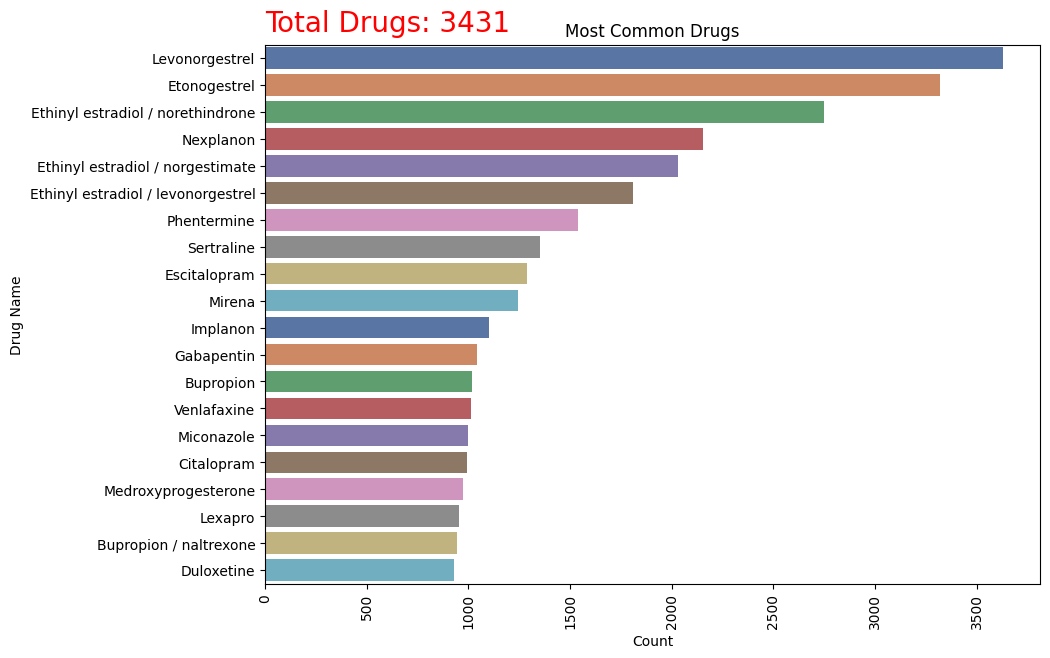

In [ ]:
# Most Common Drugs
plt.figure(figsize=(10,7))
a = df['drugname'].value_counts().sort_values(ascending = False).head(20).reset_index()
sns.barplot(data=a, y ='index',x='drugname',palette='deep')
plt.title('Most Common Drugs')
plt.ylabel('Drug Name')
plt.xlabel('Count')
plt.text(x=0.5, y=-1, s=f'Total Drugs: {len(df["drugname"].value_counts())}',color= 'red',size=20)
plt.xticks(rotation=90);

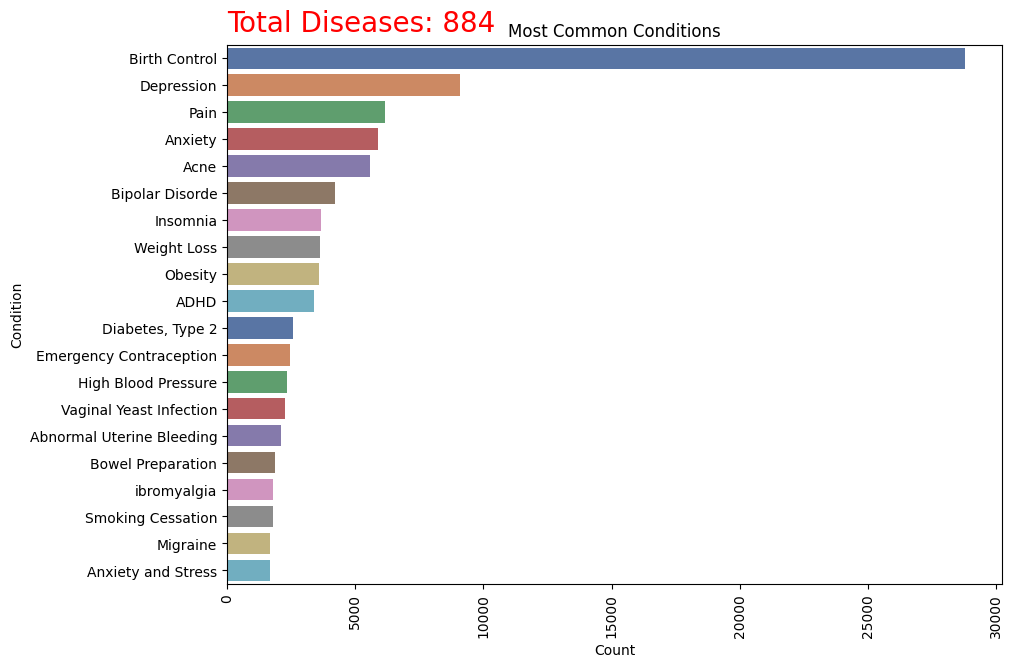

In [ ]:
# Most Common Conditions
plt.figure(figsize=(10,7))
b = df['condition'].value_counts().sort_values(ascending=False).head(20).reset_index()
sns.barplot(data = b, x= 'condition',y = 'index',palette='deep')
plt.title('Most Common Conditions')
plt.ylabel('Condition')
plt.xlabel('Count')
plt.xticks(rotation=90)
plt.text(x = 0.5, y = -1, s = f'Total Diseases: {len(df["condition"].value_counts())}',size=20,color='red');

In [ ]:
df['condition'] = df['condition'].replace({'Diabetes, Type 2':'Diabetes','Bipolar Disorde':'Bipolar Disorder','Pain':'Body Pain'})

Text(0.5, 0.98, 'Rating Distribution')

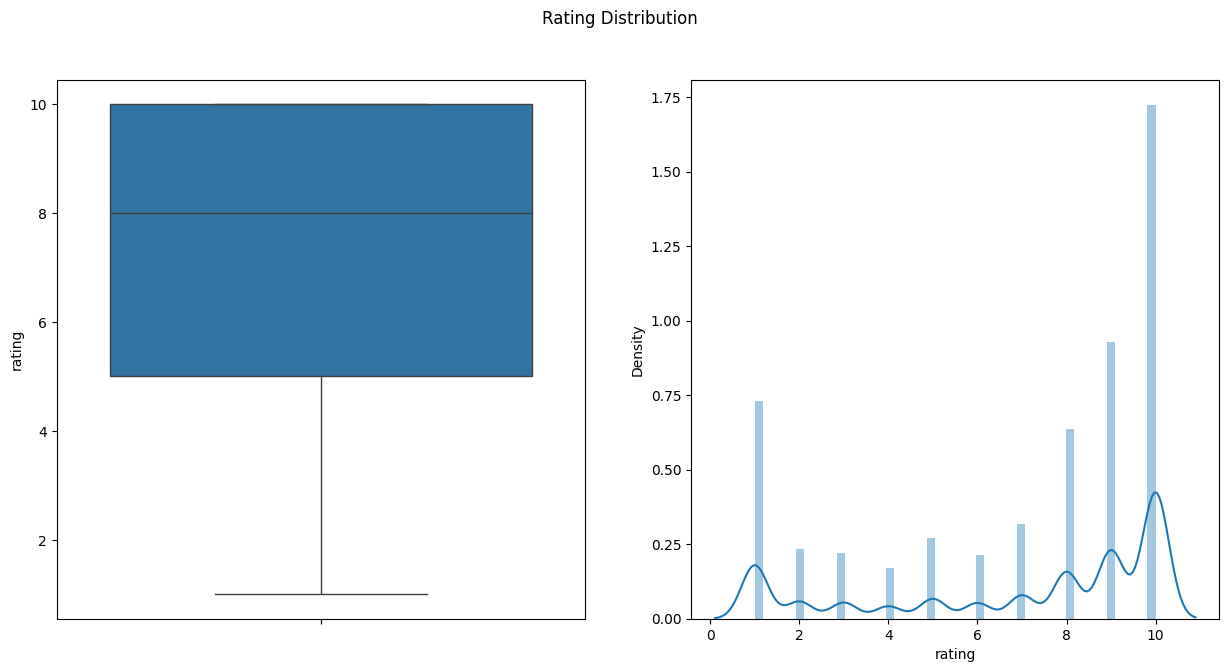

In [ ]:
#Rating Distribution
fig , (ax,bx) = plt.subplots(1,2,figsize=(15,7))
sns.boxplot(df['rating'],ax=ax)
sns.distplot(df['rating'],ax=bx)
fig.suptitle('Rating Distribution')

count    160398.000000
mean         28.097613
std          36.457876
min           0.000000
25%           6.000000
50%          16.000000
75%          36.000000
max        1291.000000
Name: usefulcount, dtype: float64

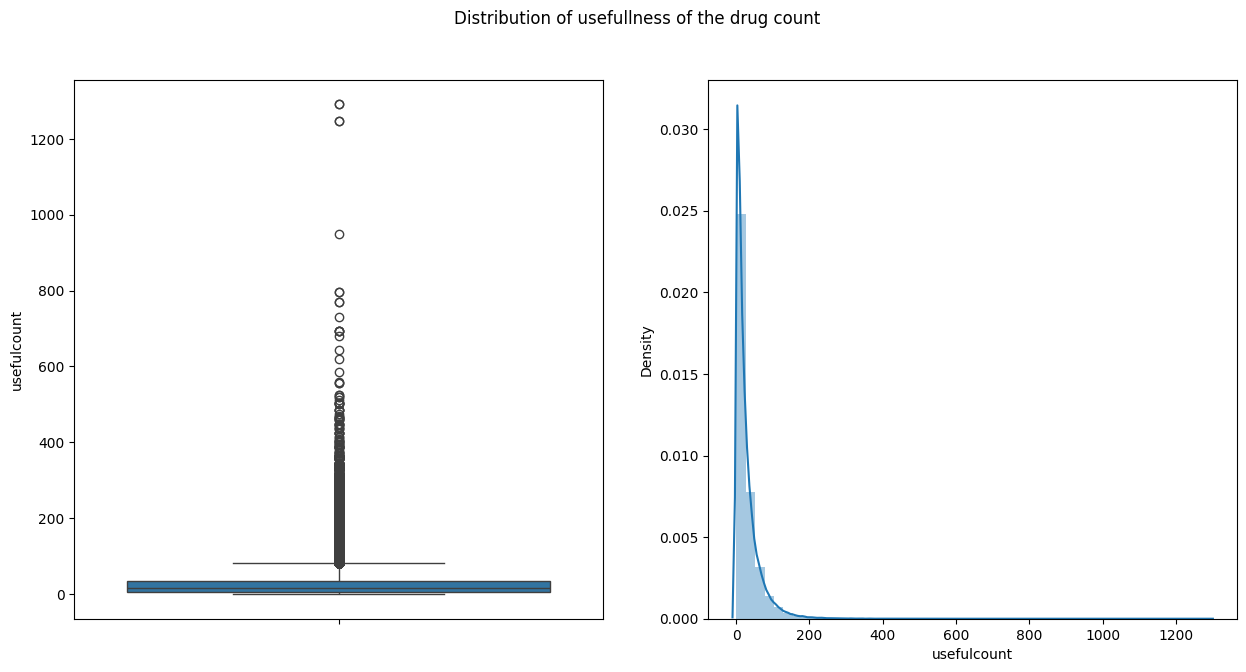

In [ ]:
# Distribution of Useful Count

fig, (ax,bx) = plt.subplots(1,2,figsize=(15,7))


sns.boxplot(df['usefulcount'],ax=ax)
sns.distplot(df['usefulcount'],ax=bx)
plt.suptitle('Distribution of usefullness of the drug count')
df['usefulcount'].describe()

### 2.1 Bivariate analysis


In [ ]:
#Filtering to only Most Common Conditions

In [ ]:
condition_count = df['condition'].value_counts()
df = df[df['condition'].transform(lambda x: condition_count[x]> 500)]

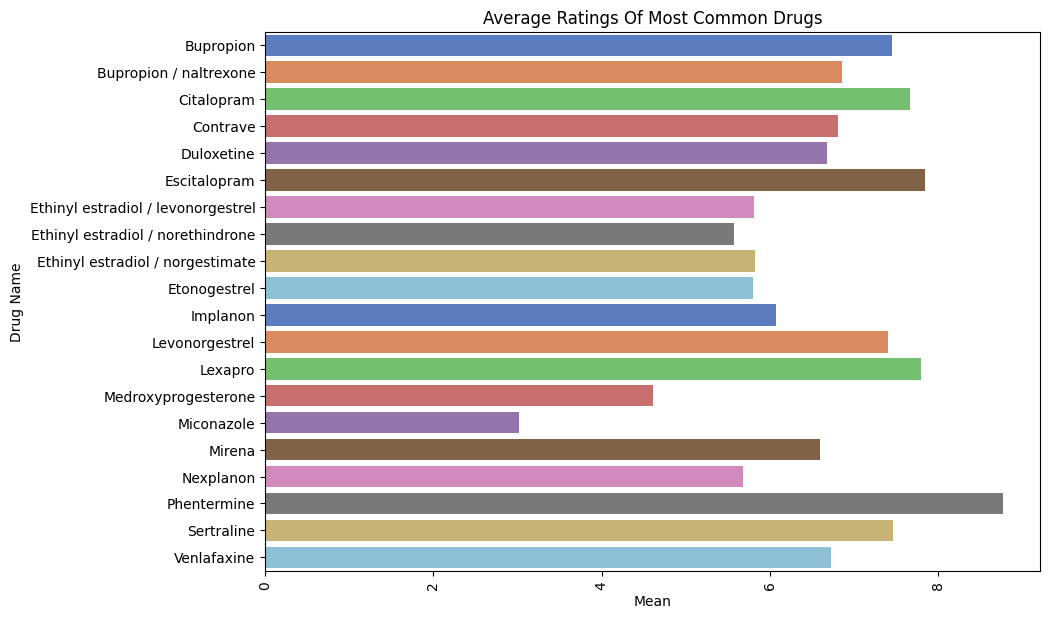

In [ ]:
#Average Ratings Of Most Common Drugs
plt.figure(figsize=(10,7))

topdrugs = df['drugname'].value_counts().sort_values(ascending=False).head(20)
c = df[df['drugname'].isin(topdrugs.index)]
c = c.groupby('drugname')['rating'].mean().reset_index()

sns.barplot(data=c, x ='rating',y='drugname',palette='muted')

plt.title('Average Ratings Of Most Common Drugs')
plt.ylabel('Drug Name')
plt.xlabel('Mean')
plt.xticks(rotation=90);

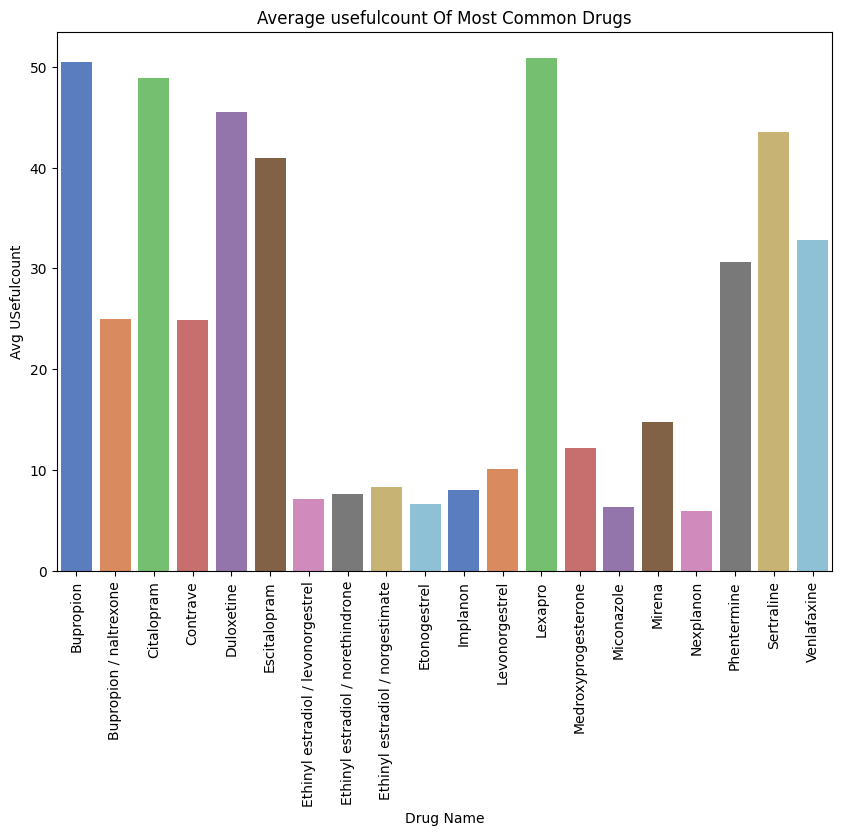

In [ ]:
#Average useful count Of Most Common Drugs
plt.figure(figsize=(10,7))

topdrugs = df['drugname'].value_counts().sort_values(ascending=False).head(20)
d = df[df['drugname'].isin(topdrugs.index)]
d = d.groupby('drugname')['usefulcount'].mean().reset_index()

sns.barplot(data=d, y ='usefulcount',x='drugname',palette='muted')

plt.title('Average usefulcount Of Most Common Drugs')
plt.xlabel('Drug Name')
plt.ylabel('Avg USefulcount')
plt.xticks(rotation=90);

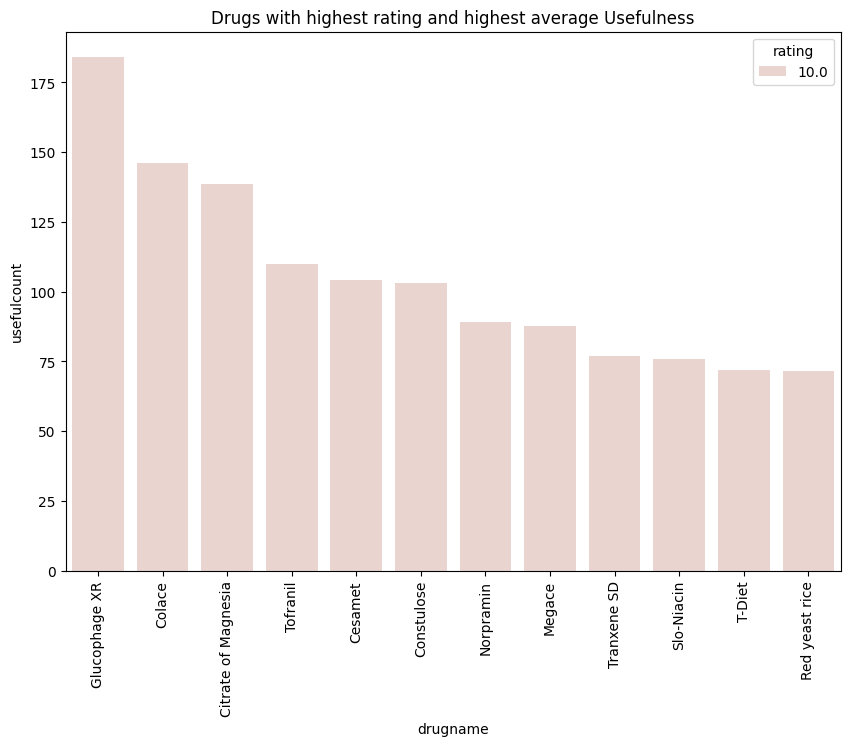

In [ ]:
e = df.groupby('drugname')[['rating','usefulcount']].mean().sort_values(ascending=False,by =['rating','usefulcount']).head(12)
plt.figure(figsize=(10,7))
sns.barplot(data=e,x='drugname',y='usefulcount',hue='rating')
plt.title('Drugs with highest rating and highest average Usefulness')
plt.xticks(rotation=90);

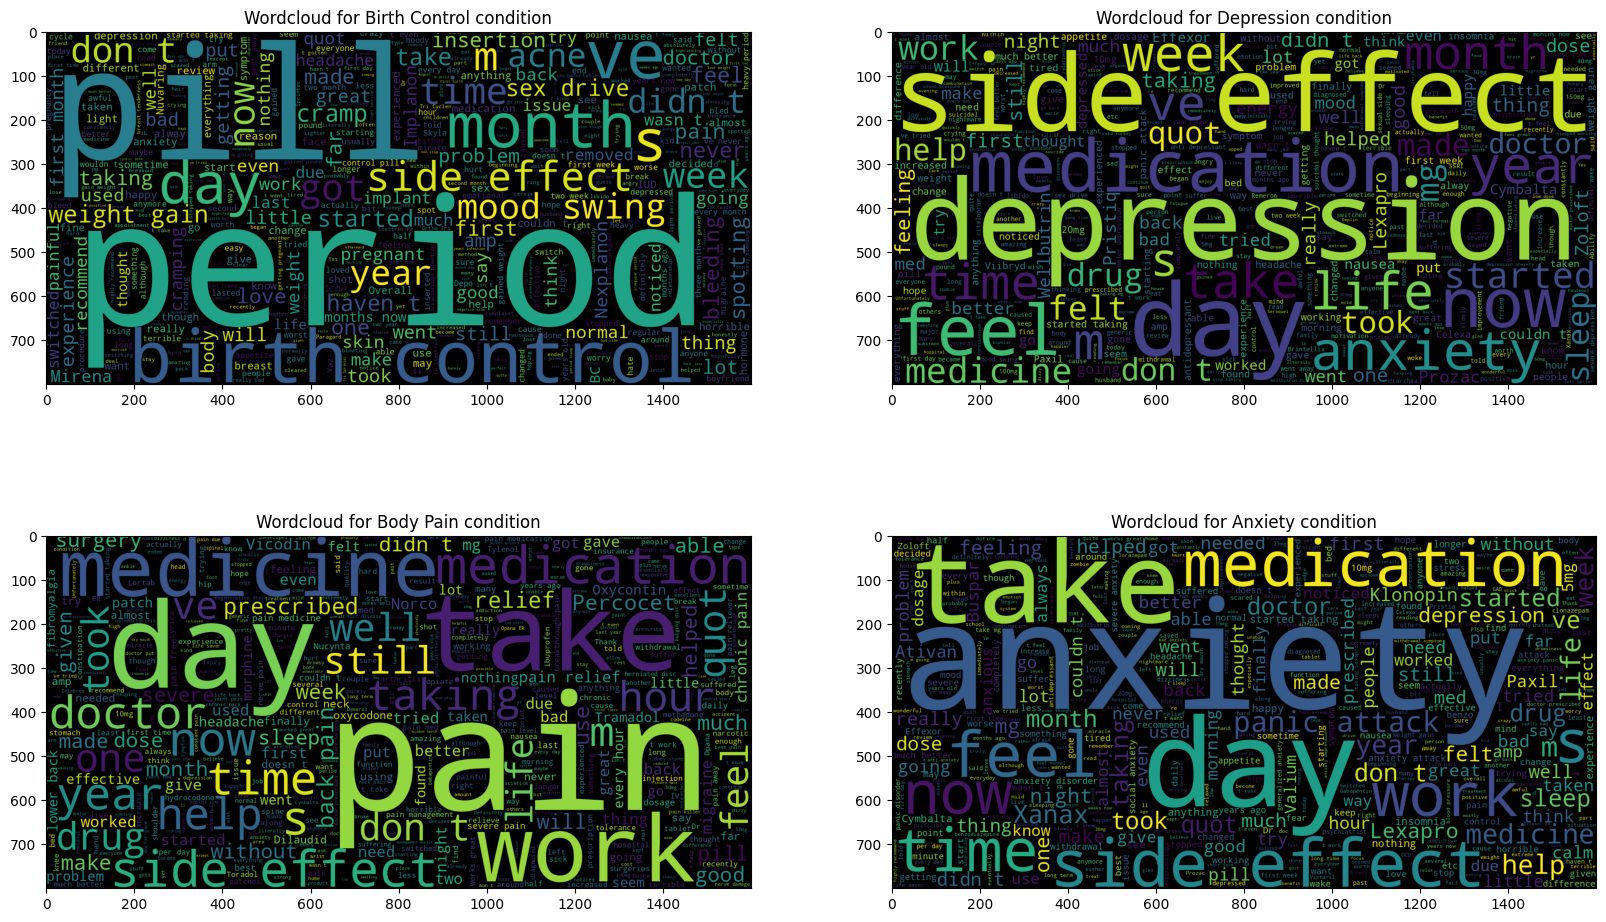

In [ ]:
# Word CLoud for all the review column
from wordcloud import WordCloud,STOPWORDS
stopwords = STOPWORDS
plt.figure(figsize = (20,12))
listy = ['Birth Control' ,'Depression', 'Body Pain' ,'Anxiety']

for i,col in enumerate(listy):
  plt.subplot(2,2,i+1)

  condition = df[df['condition']==col]['review']

  wc = WordCloud(
    max_words = 500,
    height = 800,
    width  = 1600,
    stopwords = stopwords).generate(" ".join(condition))

  plt.title(f'Wordcloud for {col} condition')
  plt.imshow(wc)

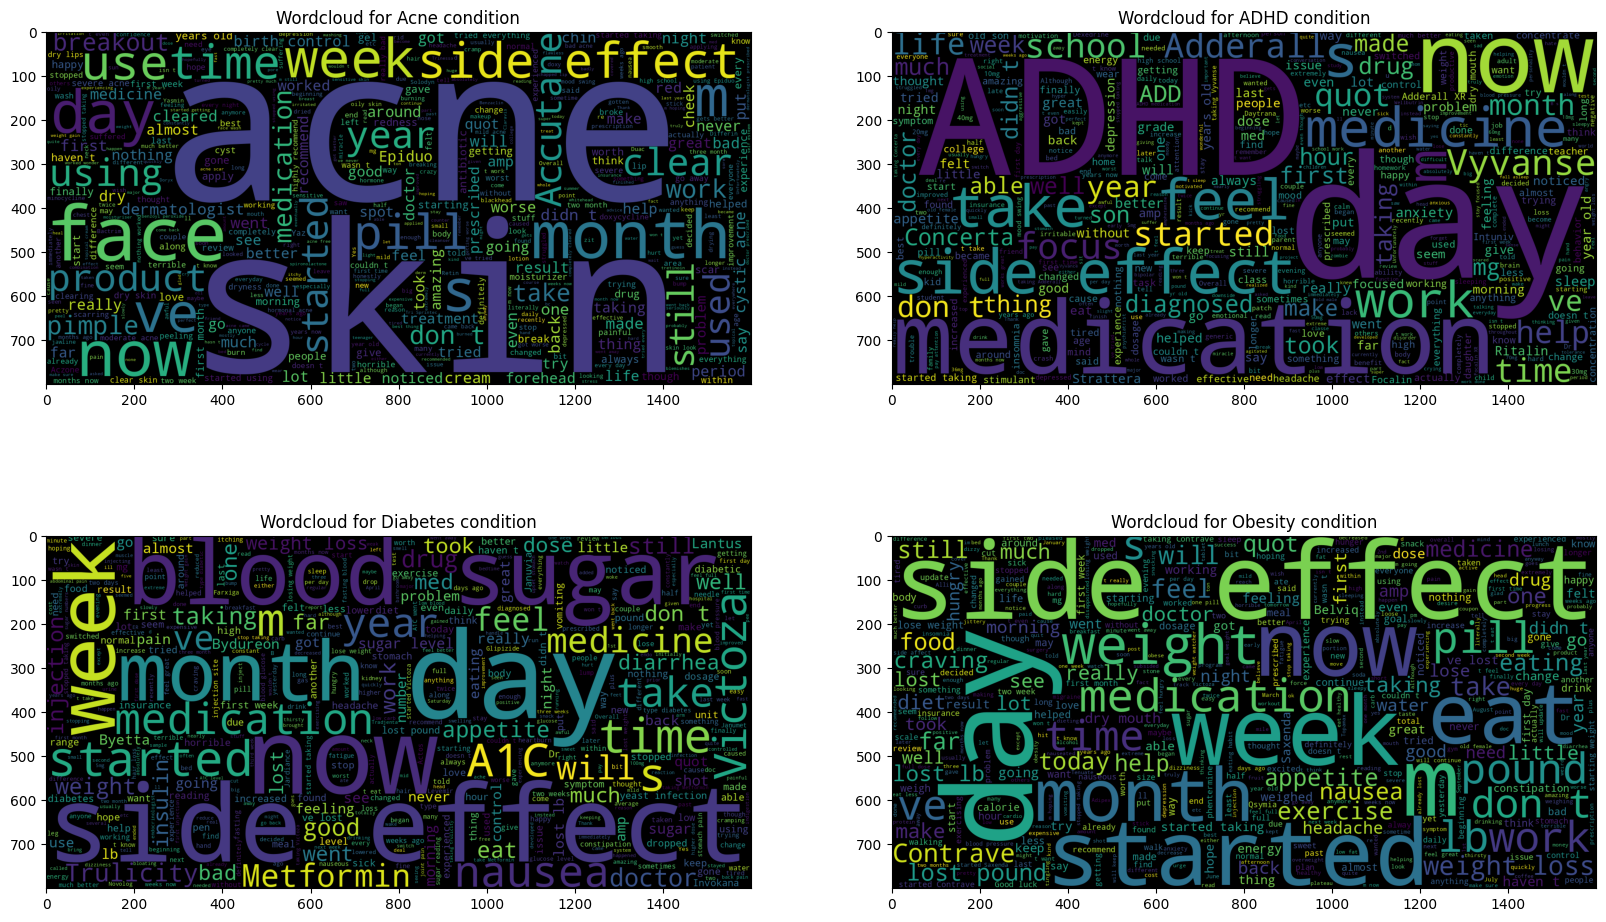

In [ ]:
plt.figure(figsize = (20,12))
listy = ['Acne', 'ADHD', 'Diabetes', 'Obesity']

for i,col in enumerate(listy):
  plt.subplot(2,2,i+1)

  condition = df[df['condition']==col]['review']

  wc = WordCloud(
    max_words = 500,
    height = 800,
    width  = 1600,
    stopwords = stopwords).generate(" ".join(condition))

  plt.title(f'Wordcloud for {col} condition')
  plt.imshow(wc)

In [ ]:
df.head()

drugname                     condition  \
index                                                           
1                    Guanfacine                          ADHD   
2                        Lybrel                 Birth Control   
3                    Ortho Evra                 Birth Control   
4      Buprenorphine / naloxone             Opiate Dependence   
5                        Cialis  Benign Prostatic Hyperplasia   

                                                  review  rating  usefulcount  
index                                                                          
1      "My son is halfway through his fourth week of ...       8          192  
2      "I used to take another oral contraceptive, wh...       5           17  
3      "This is my first time using any form of birth...       8           10  
4      "Suboxone has completely turned my life around...       9           37  
5      "2nd day on 5mg started to work with rock hard...       2           43

## 3. Text Preprocessing

In [ ]:
len(df['condition'].unique())

60

In [ ]:
Keep_conditions =[
    "Birth Control",
    "Depression",
    "Body Pain",
    "Anxiety",
    "Acne",
    "Bipolar Disorder",
    "Insomnia",
    "Weight Loss",
    "Obesity",
    "ADHD",
    "Diabetes",
    "Emergency Contraception",
    "High Blood Pressure",
    "Vaginal Yeast Infection",
    "Migraine",'Muscle Spasm','Constipation']
df = df[df['condition'].isin(Keep_conditions)]
len(Keep_conditions)

17

In [ ]:
df['index'] = range(len(df))
df.set_index('index',inplace=True)

In [ ]:
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


True

In [ ]:
review = []
for i in range(len(df)):
  rev = re.sub(r'[^a-zA-z]',' ',df['review'][i])
  rev = rev.lower()
  review.append(rev)

In [ ]:
df['cleaned_reviews'] = review

In [ ]:
corpus = []
for i in range(len(df)):
  lemmatizer = WordNetLemmatizer()
  stopword = stopwords.words('english')

  tag = df['cleaned_reviews'][i]

#Tokenizing
  tag = word_tokenize(tag)

#Lemmatizing

  tag = [lemmatizer.lemmatize(word) for word in tag if not word in set(stopword)]
  tag  = ' '.join(tag)
  corpus.append(tag)

In [ ]:
len(corpus)

88096

In [ ]:
corpus[0]

'son halfway fourth week intuniv became concerned began last week started taking highest dose two day could hardly get bed cranky slept nearly hour drive home school vacation unusual called doctor monday morning said stick day see school getting morning last two day problem free much agreeable ever le emotional good thing le cranky remembering thing overall behavior better tried many different medication far effective'

In [ ]:
df['cleaned_reviews'] = corpus
df.head()

drugname                condition  \
index                                            
0          Guanfacine                     ADHD   
1              Lybrel            Birth Control   
2          Ortho Evra            Birth Control   
3      Levonorgestrel  Emergency Contraception   
4        Aripiprazole         Bipolar Disorder   

                                                  review  rating  usefulcount  \
index                                                                           
0      "My son is halfway through his fourth week of ...       8          192   
1      "I used to take another oral contraceptive, wh...       5           17   
2      "This is my first time using any form of birth...       8           10   
3      "He pulled out, but he cummed a bit in me. I t...       1            5   
4      "Abilify changed my life. There is hope. I was...      10           32   

                                         cleaned_reviews  
index                                                     
0      son halfway fourth week intuniv became concern...  
1      used take another oral contraceptive pill cycl...  
2      first time using form birth control glad went ...  
3      pulled cummed bit took plan b hour later took ...  
4      abilify changed life hope zoloft clonidine fir...

## **4. Model Building**

### ***4.1 TF-IDF model***

In [ ]:
# Getting target and features

from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer(stop_words='english')
X = vectorizer.fit_transform(df['cleaned_reviews'])
y = df['condition']

In [ ]:
# Spliting the dataset into train and test
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

### ***4.2 Classification Models***

#### 4.2.1 Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,confusion_matrix
classifier = LogisticRegression(multi_class="ovr")
classifier.fit(X_train, y_train)
ypred = classifier.predict(X_test)
score1  = accuracy_score(y_test, ypred)
print(score1)

0.8645856980703746


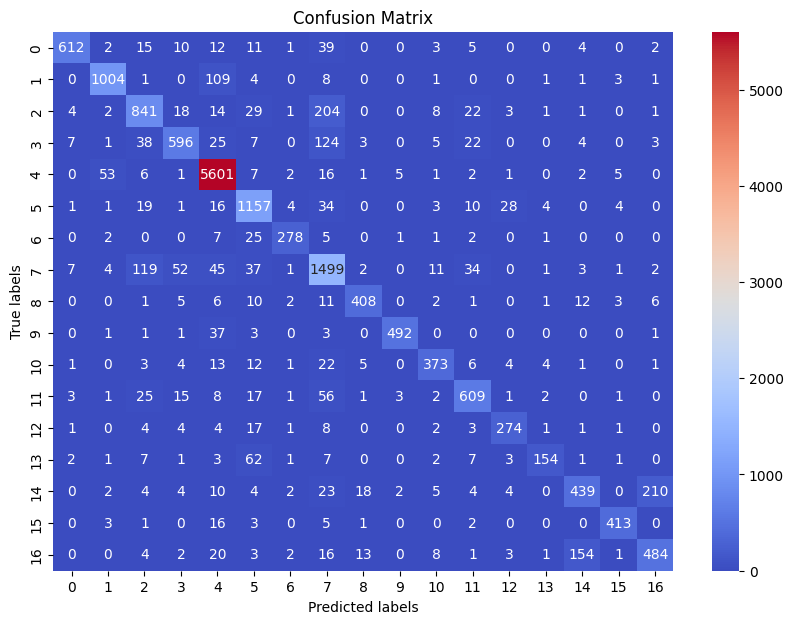

In [ ]:
cm = confusion_matrix(y_test, ypred)

plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, cmap='coolwarm', fmt='g')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()

#### 4.2.2 SVC


In [ ]:
from sklearn.svm import SVC
classifier2 = SVC()
classifier2.fit(X_train,y_train)
ypred2 = classifier2.predict(X_test)
score2 = accuracy_score(y_test,ypred2)
print(score2)

0.9025539160045403


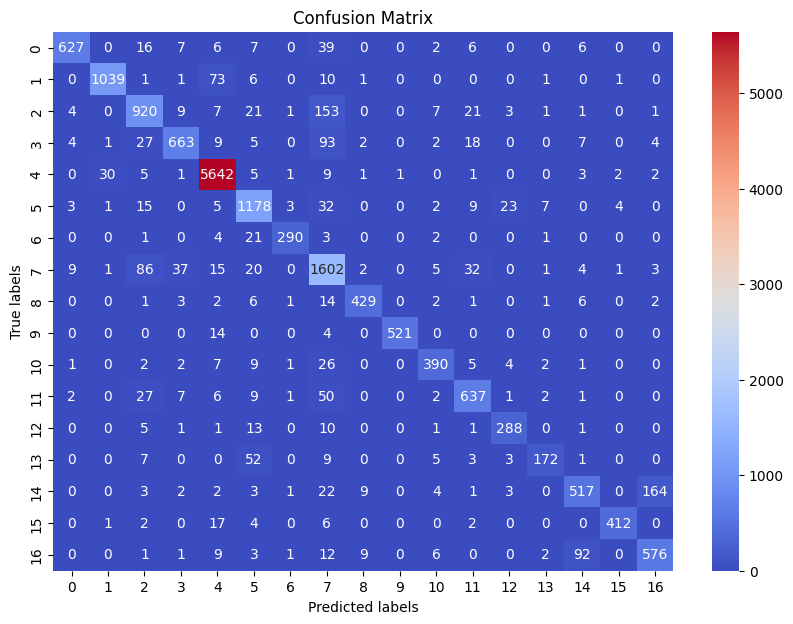

In [ ]:
cm2 = confusion_matrix(y_test, ypred2)

plt.figure(figsize=(10, 7))
sns.heatmap(cm2, annot=True, cmap='coolwarm', fmt='g')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()

#### 4.2.3 Random Forest Classifier


In [ ]:
from sklearn.ensemble import RandomForestClassifier
classifier3 = RandomForestClassifier(n_estimators = 15)

classifier3.fit(X_train, y_train)
ypred3 = classifier3.predict(X_test)
score3 = accuracy_score(y_test,ypred3)
print(score3)

0.8667990919409762


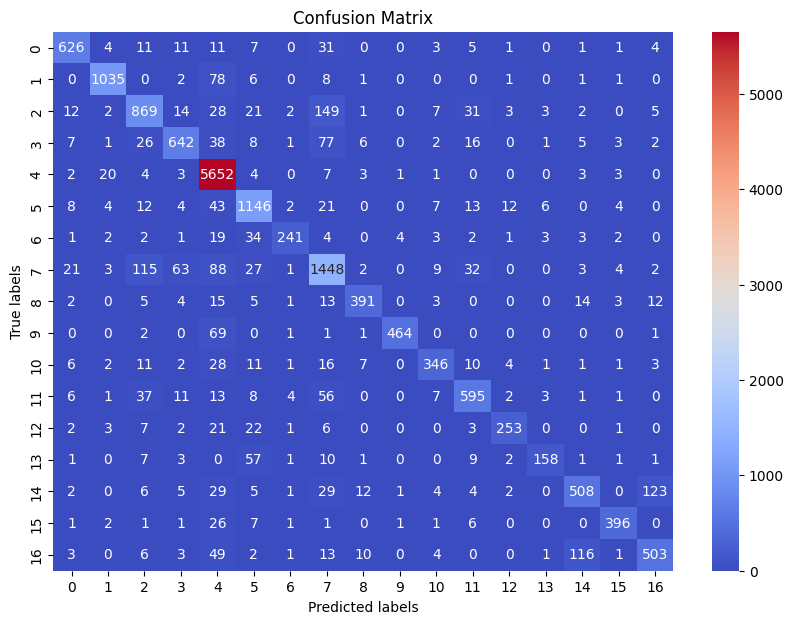

In [ ]:
cm3 = confusion_matrix(y_test, ypred3)

plt.figure(figsize=(10, 7))
sns.heatmap(cm3, annot=True, cmap='coolwarm', fmt='g')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()

#### 4.2.4 Decision Tree Classifier


In [ ]:
from sklearn.tree import DecisionTreeClassifier
classifier4 = DecisionTreeClassifier()
classifier4.fit(X_train,y_train)
ypred4 = classifier4.predict(X_test)
score4 = accuracy_score(y_test,ypred4)
print(score4)

0.8320658342792282


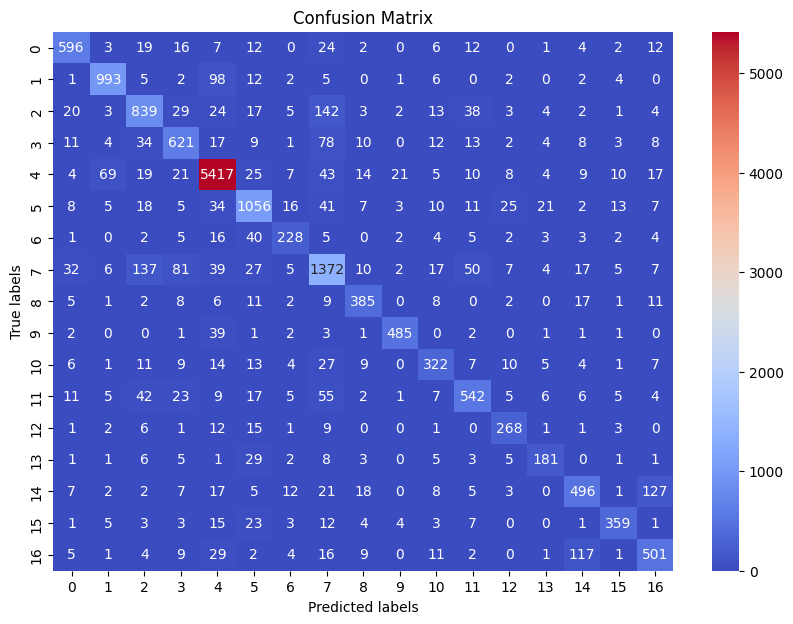

In [ ]:
cm4 = confusion_matrix(y_test, ypred4)

plt.figure(figsize=(10, 7))
sns.heatmap(cm4, annot=True, cmap='coolwarm', fmt='g')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()

## 5. Visualizing Results

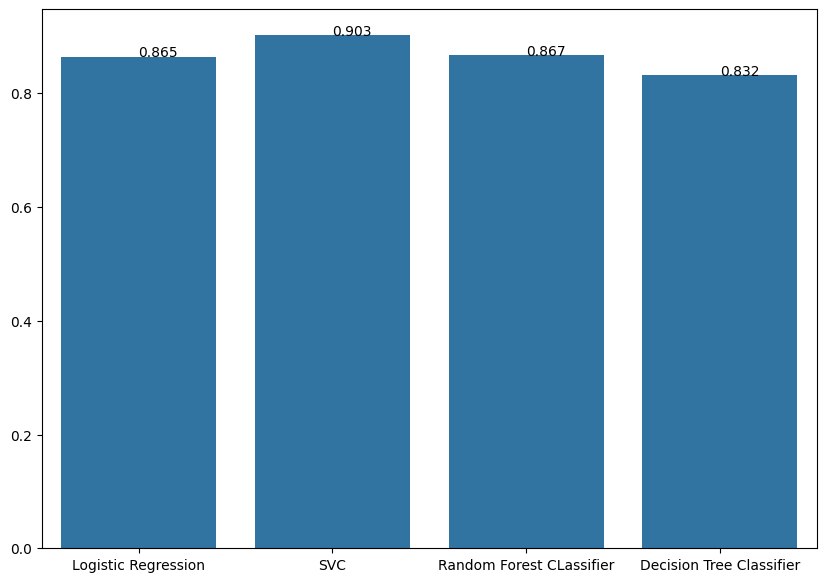

In [ ]:
scores = [score1,score2,score3,score4]
models = ['Logistic Regression','SVC','Random Forest CLassifier','Decision Tree Classifier']
plt.figure(figsize=(10,7))
sns.barplot(y=scores,x=models)
for index,data in enumerate(scores):
  plt.text(x=index,y=data,s=f'{data:.3f}')

## 6. App Structure

In [ ]:
import pickle
pickle.dump(classifier2,open('SVC.pkl','wb'))
pickle.dump(df,open('diseasedf.pkl','wb'))
pickle.dump(vectorizer,open('vectorizerr.pkl','wb'))

In [ ]:
df.head()

drugname                condition  \
index                                            
0          Guanfacine                     ADHD   
1              Lybrel            Birth Control   
2          Ortho Evra            Birth Control   
3      Levonorgestrel  Emergency Contraception   
4        Aripiprazole         Bipolar Disorder   

                                                  review  rating  usefulcount  \
index                                                                           
0      "My son is halfway through his fourth week of ...       8          192   
1      "I used to take another oral contraceptive, wh...       5           17   
2      "This is my first time using any form of birth...       8           10   
3      "He pulled out, but he cummed a bit in me. I t...       1            5   
4      "Abilify changed my life. There is hope. I was...      10           32   

                                         cleaned_reviews  
index                                                     
0      son halfway fourth week intuniv became concern...  
1      used take another oral contraceptive pill cycl...  
2      first time using form birth control glad went ...  
3      pulled cummed bit took plan b hour later took ...  
4      abilify changed life hope zoloft clonidine fir...

In [ ]:
def predictor(input):
  lemmatizer = WordNetLemmatizer()
  stopword = stopwords.words('english')

  #Text_preprocessing

  temp_corpus = []
  temp_text = []

  text = re.sub(r'[^a-zA-Z]',' ',input)
  text  = text.lower()
  temp_text.append(''.join(text))



  tokens = word_tokenize(temp_text[0])
  tokens = [lemmatizer.lemmatize(word) for word in tokens if not word in set(stopword)]
  temp_corpus.append(' '.join(tokens))

  #TF-IDF
  corpus = vectorizer.transform(temp_corpus)

  #Prediction
  predictions = classifier2.predict(corpus)
  return predictions

In [ ]:
input_paragraph = "i am overweight ,want to lose some"

print(predictor(input_paragraph))

['Obesity']


#END